## Q:  Is the starting point of a learner's reading ability a predictor for the level of improvement expected? So are those at the lowest levels making more progress in the CuC cycle than those at higher levels?

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 50)

In [3]:
df = pd.read_csv('data/merged_Uganda.csv')
df.head()

,Unnamed: 0,ChildrenId,ResultBaseline,ResultRound1,ResultRound2,ResultEndline,Baseline to Round 1,Round 1 to Round 2,Baseline to Endline,Completing Result Baseline to Endline-Story/Comprehension Level,AtLeastAchievedSentence,ComprehensionAchieved,StoryAchieved,Baseline_Endline,Gender,AcademicYearId,Term,Year,Grade,Age,EoR1,EoR2,EoR3/Endline,ParentTypeId,BaselineClass,SchoolID,ClassID,IsActiveChildTable,IsCurrentChildrenAcademicTable,IsActiveSchool,IsActiveClass,CuCStatus,DeleteReasonId,AcademicYearName,AttendanceRate
0,0,36161,Word,0,Story with comprehension,Story with comprehension,0,0,Increase,True,True,True,False,Increase 3 Levels,Male,26,2,2022,Grade 5,14.0,No,Yes,Yes,1.0,No,185,3010,True,True,True,True,True,0.0,2022-Hempel-Literacy-CuC Cycle 1,0.8
1,1,31440,Letter,0,Story with comprehension,Story with comprehension,0,0,Increase,True,True,True,False,Increase 4 Levels,Female,26,2,2022,Grade 5,16.0,No,Yes,Yes,2.0,No,185,2619,True,True,True,True,True,0.0,2022-Hempel-Literacy-CuC Cycle 1,0.0
2,2,36143,Word,0,0,Story with comprehension,0,0,Increase,True,True,True,False,Increase 3 Levels,Male,26,2,2022,Grade 4,14.0,No,No,Yes,2.0,No,185,3009,True,True,True,True,True,0.0,2022-Hempel-Literacy-CuC Cycle 1,0.0
3,3,36132,Word,Story,0,Story with comprehension,Increase,0,Increase,True,True,True,True,Increase 3 Levels,Male,26,2,2022,Grade 6,17.0,Yes,No,Yes,1.0,No,185,3009,True,True,True,True,True,0.0,2022-Hempel-Literacy-CuC Cycle 1,1.0
4,4,31423,Letter,Word,Story with comprehension,Story with comprehension,Increase,Increase,Increase,True,True,True,False,Increase 4 Levels,Female,26,2,2022,Grade 6,15.0,Yes,Yes,Yes,1.0,No,185,2619,True,True,True,True,True,0.0,2022-Hempel-Literacy-CuC Cycle 1,0.0


In [4]:
df['ResultBaseline'].unique()


array(['Word', 'Letter', 'Beginner', 'Sentence', 'Story',
       'Story with comprehension'], dtype=object)

In [5]:
groupped = df.groupby('ResultBaseline').agg(
    Increase = ('Baseline to Endline', lambda x: (x=='Increase').mean()),
    Decrease = ('Baseline to Endline', lambda x: (x=='Decrease').mean()),
    Stayed_The_Same = ('Baseline to Endline', lambda x: (x=='Stayed The Same').mean()),
).reset_index()


groupped['ResultBaseline'] = pd.Categorical(groupped['ResultBaseline'], categories=[
    'Beginner', 'Letter', 'Word', 'Sentence', 'Story', 'Story with comprehension'
], ordered=True)

# Sorting by the custom order
groupped = groupped.sort_values('ResultBaseline')
groupped

,ResultBaseline,Increase,Decrease,Stayed_The_Same
0,Beginner,0.968529,0.000000,0.031471
1,Letter,0.824201,0.024462,0.151337
5,Word,0.809614,0.046644,0.143741
2,Sentence,0.662413,0.135731,0.201856
3,Story,0.593668,0.166227,0.240106
4,Story with comprehension,0.000000,0.862069,0.137931


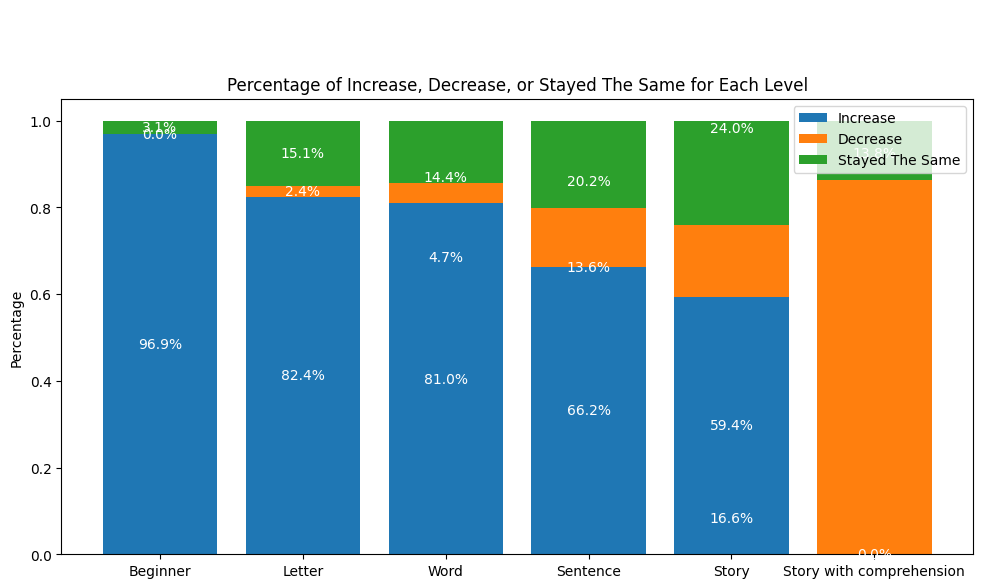

In [6]:

fig, ax = plt.subplots(figsize=(10, 6))

bars_increase = ax.bar(groupped['ResultBaseline'], groupped['Increase'], label='Increase')
bars_decrease = ax.bar(groupped['ResultBaseline'], groupped['Decrease'], bottom=groupped['Increase'], label='Decrease')
bars_same = ax.bar(groupped['ResultBaseline'], groupped['Stayed_The_Same'], bottom=groupped['Increase'] + groupped['Decrease'], label='Stayed The Same')

for bar in bars_increase:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.1%}', ha='center', va='center', color='white')

for bar in bars_decrease:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, groupped['Increase'][bars_decrease.index(bar)] + height / 2, f'{height:.1%}', ha='center', va='center', color='white')

for bar in bars_same:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, (groupped['Increase'] + groupped['Decrease'])[bars_same.index(bar)] + height / 2, f'{height:.1%}', ha='center', va='center', color='white')

ax.set_ylabel('Percentage')
ax.set_title('Percentage of Increase, Decrease, or Stayed The Same for Each Level')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()
